# E7-3 Simple Linear Regression Demo
This example demonstrates supervised machine learning by simple linear regression.

## Step 1: Problem Analysis and Framing

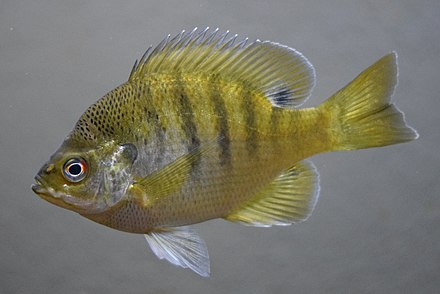

In [ ]:
# For data manipulation
import pandas as pd

# for scientific computation
import numpy as np

# for data analysis
from sklearn.preprocessing import StandardScaler 
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm

# for diagramming 
import matplotlib.pyplot as plt
import seaborn as sns

# For serialization and deserialization of data from/to file
import pickle

## Step 2: Data Preparation

### 2.1 Read data

In [ ]:
# read the data
df = pd.read_csv("../data/bluegills.txt", sep = '\t')

In [ ]:
df.shape

In [ ]:
# get idea of the look
df.head(10)

In [ ]:
# see which are the attribute labels
list(df)

In [ ]:
# get idea of columns and types
df.info()

### 2.2 Get Asquainted with the Descriptive Statistics of Data

In [ ]:
# get idea of basic statistical parameters for each column
df.describe()

In [ ]:
# if you want to change the format, for example to avoid scientific notation, e.g. e+04
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
# plot all
plt.ylabel('length')
plt.xlabel('age')
plt.scatter(df.age, df.length, color='green')
plt.show()

In [ ]:
# sns.histplot(df['age'],  label='age')  
sns.distplot(df['age'],  label='age', norm_hist=True)  

In [ ]:
sns.distplot(df['length'],  label='length', norm_hist=True) 

### 2.3 Clean the Data

In [ ]:
# to check null values in data
df.isnull().sum()

In [ ]:
# same visualized
# makes sence if you have null values
sns.heatmap(df.isnull(), yticklabels= False, cbar=False, cmap= 'viridis')

Above representation shows that our data does not have any null values, so no further restoration is needed.

### 2.4 Investigate the Inter-Dependencies of the Features
Create a correlation matrix to see which features determine the output at most, as well as whether there are some correlated features. <br>
If two features are correlated, only one of them can represent both.

In [ ]:
corr_matrix = df.corr()
corr_matrix

In [ ]:
# plot the matrix as a heat map
plt.subplots(figsize = (10, 8))
sns.heatmap(corr_matrix, annot=True)

## Step 3: Train a Model

### 3.1 Method from _LinearRegression_

#### Split the Data in Dependent y and Independent X Data Sets

In [ ]:
X = df['length'].values.reshape(-1, 1)
y = df['age'].values.reshape(-1, 1)

In [ ]:
# plot all
plt.ylabel('age')
plt.xlabel('length')
plt.scatter(X, y, color='blue')
plt.show()

In [ ]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#### Split the Data in Training and Testing Sets

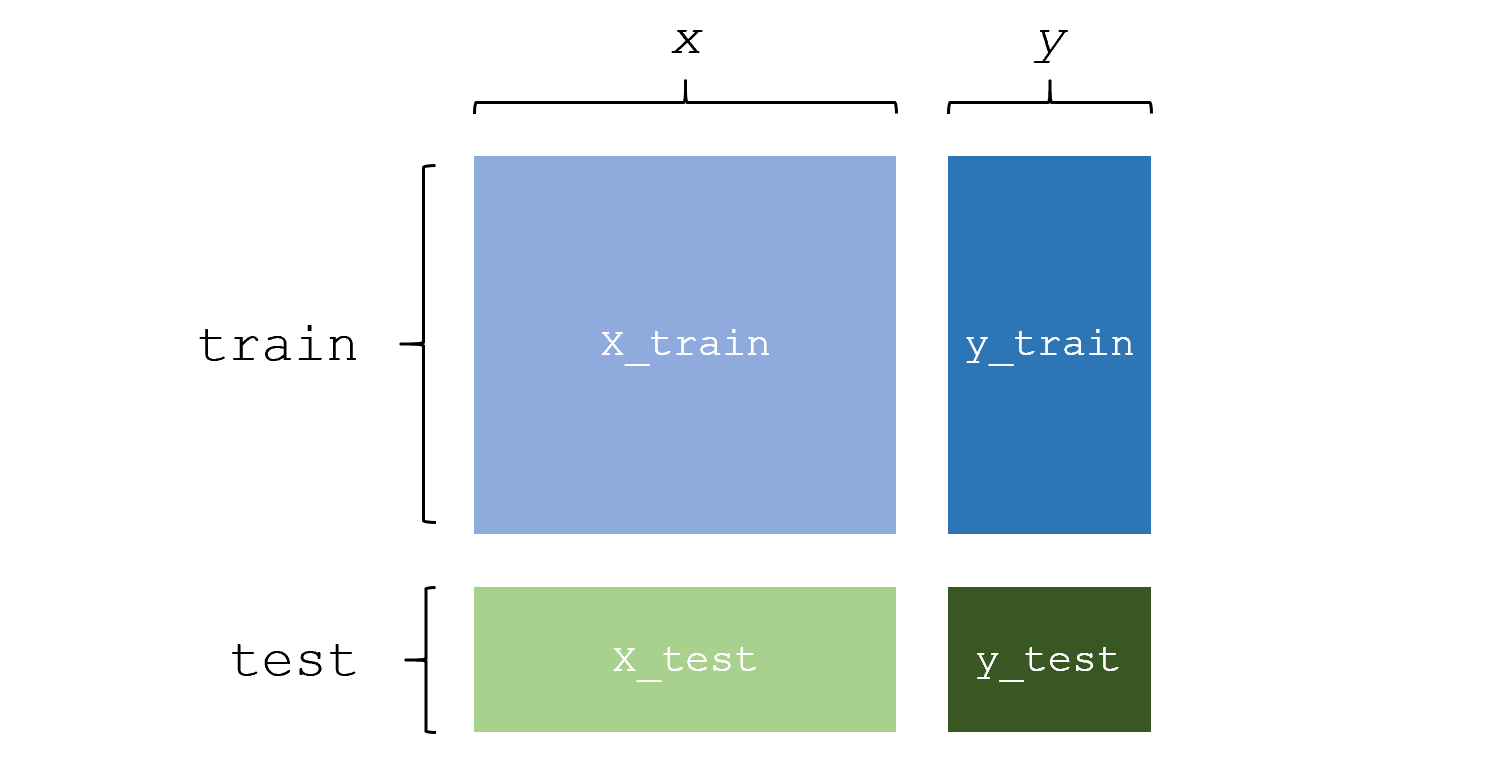

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) 

In [ ]:
# creating an instance of Linear Regression model
myreg = LinearRegression()

In [ ]:
# fit it to our data
myreg.fit(X_train, y_train)
myreg

In [ ]:
# get the calculated coefficients
a = myreg.coef_
b = myreg.intercept_

In [ ]:
a

In [ ]:
b

In [ ]:
y_predicted = myreg.predict(X_test)

In [ ]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, y_predicted, color='orange')
plt.xlabel('length')
plt.ylabel('age')
plt.show()

In [ ]:
R2 = myreg.score(X, y)
R2

### 3.1 Method _polyfit_ from _numpy_

#### Split the Data in Dependent y and Independent X Data Sets

In [ ]:
# Split X and y
X, y = df.length, df.age

#### Split the Data in Training and Testing Sets

In [ ]:
# split the set into subsets for training and testing
from sklearn.model_selection import train_test_split

# default proportion is 75:25
# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2) 

In [ ]:
# the shape of the subsets
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
# randomly selected
y_train

#### Train a Model

In [ ]:
# build a model from the train data with method 'polyfit'
model = np.polyfit(X_train, y_train, 1)

In [ ]:
# get the result of fitting the regression line on the train data
model

In [ ]:
a, b = model[0], model[1]

In [ ]:
# build the model from the test data
test = np.polyfit(X_test, y_test, 1)
test

In [ ]:
a1, b1 = test[0], test[1]

In [ ]:
# Visualise the Linear Regression 
plt.title('Linear Regression')
plt.scatter(X, y, color='green')
plt.plot(X_train, a*X_train + b, color='blue')
plt.plot(X_test, a1*X_test + b1, color='orange')
plt.xlabel('length')
plt.ylabel('age')
plt.show()

We observe some differences between the two models.

## Step 4: Test the Models

### 4.1 Test with Known Data

In [ ]:
age_predicted = myreg.predict([[137]])
age_predicted

In [ ]:
age_predict = a*137 - b
age_predict

### 4.2 Predict with Unknown Data

In [ ]:
# assume a new fish 
length = 91
age_predicted = myreg.predict([[length]])
age_predicted

## Step 5: Model Evaluation 

We need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems:

- **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

- **Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

- **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# MAE
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_predicted)
print(mae)

In [ ]:
# MSE
mse = metrics.mean_squared_error(y_test, y_predicted)
print(mse)

In [ ]:
# RMSE
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_predicted))
print(rmse)

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error
- **MSE** is more popular than MAE, because MSE "punishes" larger errors
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units

### Calculate R-squared

In [ ]:
# Explained variance score: 1 is perfect prediction
eV = round(sm.explained_variance_score(y_test, y_predicted), 2)
print('Explained variance score ',eV )

In [ ]:
# R-squared
from sklearn.metrics import r2_score
#r2_score(y, predict(X))
r2_score(y_test, y_predicted)

This is bad result!

# Step 5: Store the Model

In [ ]:
# Store the model in a file
model_file = '../deploy/mypolifit.pkl'

# Save now
with open(model_file, 'wb') as f:
    pickle.dump(model, f)

In [ ]:
# To load it later for reuse
with open(model_file, 'rb') as f:
    mymodel = pickle.load(f)

In [ ]:
# Test reading from the file
predict = np.poly1d(mymodel)
my_age_prediction = predict(120)
print(my_age_prediction)

## Exercise
Your turn - analyse the students data

## Reference
https://www.kaggle.com/aniketg11/predicting-house-prices-through-regression/notebook <br>
https://www.dataquest.io/blog/understanding-regression-error-metrics/ <br>